# Fonctions avancées en Python
__Durée : 1h30__

Pour finir, quelques fonctions utiles pour traiter des données en Python

## Scraping

urllib et beautifulsoup

* Récupérer des données sur une page
* Extraire des données d'un fichier xml
 * Exemple de l'extraction des liens
* Présentation de scrapy https://scrapy.org

In [52]:
import urllib3 as url

In [54]:
http = url.PoolManager()

In [55]:
request = http.request("GET","https://nealcaren.github.io/python-tutorials/")

/home/emilien/.conda/envs/p35/lib/python3.5/site-packages/urllib3/connectionpool.py:857: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [57]:
print(request.data)

b'<!DOCTYPE html>\n<html>\n<head>\n\n<meta charset="utf-8" />\n<title>index</title>\n\n<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.1.10/require.min.js"></script>\n<script src="https://cdnjs.cloudflare.com/ajax/libs/jquery/2.0.3/jquery.min.js"></script>\n\n<style type="text/css">\n    .clearfix{*zoom:1}.clearfix:before,.clearfix:after{display:table;content:"";line-height:0}\n.clearfix:after{clear:both}\n.hide-text{font:0/0 a;color:transparent;text-shadow:none;background-color:transparent;border:0}\n.input-block-level{display:block;width:100%;min-height:30px;-webkit-box-sizing:border-box;-moz-box-sizing:border-box;box-sizing:border-box}\narticle,aside,details,figcaption,figure,footer,header,hgroup,nav,section{display:block}\naudio,canvas,video{display:inline-block;*display:inline;*zoom:1}\naudio:not([controls]){display:none}\nhtml{font-size:100%;-webkit-text-size-adjust:100%;-ms-text-size-adjust:100%}\na:focus{outline:thin dotted #333;outline:5px auto -webkit-focus-r

In [60]:
with open("Données/pythonforss.txt","wb") as f:
    f.write(request.data)

In [61]:
import bs4 as bs

In [64]:
page = bs.BeautifulSoup(request.data)

In [70]:
liens = page.find_all("a")

In [75]:
liens[18]["href"]

'http://sumall.org'

In [80]:
liens_nettoyés = [lien["href"] for lien in liens]

In [82]:
[lien for lien in liens_nettoyés if "twitter" in lien]

['http://twitter.com/HaphazardSoc',
 'http://twitter.com/HaphazardSoc',
 'http://twitter.com/b0rk',
 'https://twitter.com/bkeegan',
 'https://twitter.com/jseabold',
 'https://twitter.com/bkeegan',
 'https://twitter.com/fisadev',
 'https://twitter.com/djvelkov',
 'http://twitter.com/ptwobrussell\n[http://newcoder.io/api/',
 'https://twitter.com/chrisalbon',
 'https://twitter.com/haphazardsoc',
 'https://twitter.com/gjreda',
 'https://twitter.com/haphazardsoc',
 'https://twitter.com/gjreda',
 'https://twitter.com/jgbos',
 'https://twitter.com/b0rk',
 'https://twitter.com/greenbacker',
 'https://twitter.com/trevormunoz',
 'https://twitter.com/gmonce',
 'https://twitter.com/gmonce',
 'https://twitter.com/poweredbyaltnet',
 'https://twitter.com/tdhopper',
 'https://twitter.com/haphazardsoc',
 'https://twitter.com/jgbos',
 'https://twitter.com/treycausey',
 'https://twitter.com/gmonce',
 'http://nbviewer.ipython.org/github/rosariomgomez/fashion/blob/master/twitter/twitter_classifier.ipynb',


## Exercice collectif : Mode hackathon on

Pour le moment, nous nous sommes concentrés sur Le Monde. Dans le dossier il y a les données pour Libération et La croix aussi.
* Extraire les données des fichiers html
* Construire un nouveau tableau avec tous les journaux
* Poser la question de la couverture des différents journaux

In [3]:
#Faire le script qui permet de récupérer des informations sur un site (ex : le bon coin)
#Faire un script qui permet de récupérer tous les liens d'une page html

## Analyse de réseau

présentation de la librairie networkx

* Comprendre la structure de réseau
* Calculer certains indicateurs
* Faire une sortie pour Gephi
* Calculer des indicateurs de centralité
* Visualiser des réseaux

In [84]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
G = nx.Graph()

In [91]:
collaborations = [
    ["Sylvain","Daniela"],
    ["Sylvain","Lénie"],
    ["Sylvain","Estelle"],
    ["Sylvain","Emilien"],
    ["Emilien","Lénie"],
    ["Lénie","Estelle"],
    ["Daniela","Emilien"],
    ["Lénie","Estelle"],
    ["Lénie","Daniela"],
    ["Emilien","Kamil"],
    ["Emilien","Paul"],
    ["Kamil","Paul"],
    ["Abdou"],
    ["Jean-Charles","Lola"],
    ["Victoria","Marie-Ann"],
    ["Victoria","Rajae"],
    ["Marie-Ann","Rajae"]
]

In [103]:
for i in collaborations:
    if len(i)>1:
        G.add_edge(i[0],i[1])

In [104]:
G.add_node("Abdou")

Créer un réseau de qui travaille avec qui dans la pièce. Pour cela : 
* Créer des noeuds
* Créer des liens

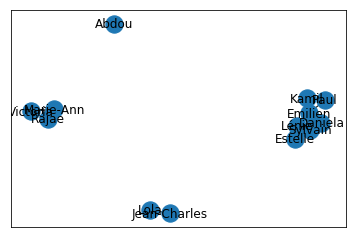

In [105]:
nx.draw_networkx(G)

In [107]:
cd .

/home/emilien/Dropbox/Formation Python/python-shs


In [106]:
nx.write_graphml(G,"reseau.graphml")

In [108]:
nx.betweenness_centrality(G)

{'Abdou': 0.0,
 'Daniela': 0.0,
 'Emilien': 0.12121212121212122,
 'Estelle': 0.0,
 'Jean-Charles': 0.0,
 'Kamil': 0.0,
 'Lola': 0.0,
 'Lénie': 0.030303030303030304,
 'Marie-Ann': 0.0,
 'Paul': 0.0,
 'Rajae': 0.0,
 'Sylvain': 0.030303030303030304,
 'Victoria': 0.0}

Calculer des indicateurs de centralité

## Aller plus loin

* Pour gérer les gros jeux de données : Dask
* Pour faire de la cartographie : Geopandas

In [109]:
from nltk.stem.snowball import FrenchStemmer


In [110]:
stemmer = FrenchStemmer()


In [111]:
stemmer.stem('voudrais')

'voudr'

In [112]:
corpus = pd.read_excel("./corpus-date.xlsx")

In [123]:
pd.Series([stemmer.stem(i) for i in corpus["Contenu"][10].replace("."," ").replace("'"," ").replace(","," ").split(" ") if len(i)>5]).value_counts()

homéopath          8
médic              7
ministr            5
rembours           4
­médic             3
mattei             3
équit              3
preuv              3
efficac            3
jean-françois      3
fonction           2
contr              2
dérembours         2
époqu              2
ruptur             2
boiron             2
charg              2
aujourd            2
aut                2
commiss            2
niveau             2
placebo            2
transparent        2
raison             2
scientif           2
touch              2
sembl              2
dit-il             2
travailleur        1
conserv            1
                  ..
attribu            1
contest            1
prescript          1
utilis             1
précédent          1
encor              1
décembr            1
­polit             1
assurance-malad    1
réduit             1
national           1
part               1
demand             1
année-là           1
procur             1
aucun              1
ancien       